In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  #optional
warnings.filterwarnings('ignore')
from IPython.display import HTML,display
from datetime import datetime


In [6]:
df = pd.read_csv('/Users/siddharthmalladi/Downloads/archive/city_day.csv') 

# directory address might be different for other users

# If you're unable to find your file directory, kindly go through my ReadMe file

In [7]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
df = df.loc[:,~df.columns.duplicated()]


In [10]:
pip install pandas.profiling

     |████████████████████████████████| 258 kB 1.9 MB/s eta 0:00:01
  Using cached ipywidgets-7.5.1-py2.py3-none-any.whl (121 kB)
     |████████████████████████████████| 61 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 5.9 MB/s eta 0:00:011
     |████████████████████████████████| 3.1 MB 4.8 MB/s eta 0:00:01
  Using cached Jinja2-2.11.2-py2.py3-none-any.whl (125 kB)
     |████████████████████████████████| 599 kB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.8 MB/s eta 0:00:011
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)
     |████████████████████████████████| 170 kB 7.9 MB/s eta 0:00:01
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
     |████████████████████████████████| 127 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 269 kB 7.6 MB/s eta 0:00:01
    

In [12]:
import pandas_profiling

# This package is used for Data Analysis... I'll try adding a Tableau Dashboard shortly after as well
# But this should give you an idea of what you're looking at

In [13]:
data_report = pandas_profiling.ProfileReport(df, minimal = True)

data_report

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [17]:
df.apply(lambda x: sum(x.isnull()),axis=0)


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [18]:
df.groupby('PM2.5').mean()

# We saw lots of NaN values in this particular column
# So I fixed that by taking the mean, but you're free to try other methods

,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,,,,,,,,,,,,
0.04,14.30,NaN,NaN,0.00,NaN,0.65,1.29,17.17,0.43,NaN,NaN,51.0
0.16,3.16,11.69,0.07,15.41,22.42,0.02,1.08,1.29,NaN,NaN,NaN,19.0
0.24,1.15,11.56,0.05,15.14,25.45,0.02,1.38,1.40,NaN,NaN,NaN,19.0
0.28,10.02,12.04,0.13,15.96,28.73,0.12,2.03,0.95,NaN,NaN,NaN,20.0
0.98,4.59,11.63,0.07,15.17,24.59,0.16,8.82,3.77,NaN,NaN,NaN,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
914.64,985.00,1.32,3.61,1.36,3.63,0.23,5.56,27.96,0.14,0.99,NaN,NaN
914.94,NaN,44.34,63.94,42.71,NaN,1.45,0.64,0.80,NaN,NaN,NaN,676.0
916.67,1000.00,37.70,13.57,69.67,99.42,0.23,48.03,51.30,86.24,NaN,NaN,NaN


In [19]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [28]:
pip install statsmodels

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import missingno as msno
from sklearn.impute import KNNImputer
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statmodels.tsa.stattools import adfuller,acf,pcaf,arma_order_select_ic

plt.style.use('seaborn-whitegrid')
from termcolor import colored

ModuleNotFoundError: No module named 'statmodels'

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
from sklearn.impute import KNNImputer
# Autoreg, autocorrolationand time series tools...

from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic


plt.style.use('seaborn-whitegrid')



In [35]:
city_day = pd.read_csv('/Users/siddharthmalladi/Downloads/archive/city_day.csv').sort_values(by = ['Date','City'])

In [36]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.8+ MB


In [39]:
print(list(city_day.columns))

['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [43]:
city_day.Date = city_day.Date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
city_day = city_day.sort_values(by = 'Date')

TypeError: strptime() argument 1 must be str, not Timestamp

In [45]:
pd.to_datetime()

TypeError: to_datetime() missing 1 required positional argument: 'arg'

In [47]:
city_day.corr().AQI.sort_values(ascending= False)

AQI        1.000000
PM10       0.803313
CO         0.683346
PM2.5      0.659181
NO2        0.537071
SO2        0.490586
NOx        0.486450
NO         0.452191
Toluene    0.279992
NH3        0.252019
O3         0.198991
Xylene     0.165532
Benzene    0.044407
Name: AQI, dtype: float64

In [51]:
city_day['B_X_O3_NH3'] = city_day['Benzene'] +\
city_day['Xylene'] + city_day['O3'] + city_day['NH3']

city_day['ParticulateMatters'] = city_day['PM2.5'] + city_day['PM10']

corr_with_AQI = city_day.corr().AQI.sort_values(ascending = False)


corr_with_AQI

AQI                   1.000000
ParticulateMatters    0.823098
PM10                  0.803313
B_X_03_NH3            0.727571
CO                    0.683346
PM2.5                 0.659181
B_X_O3_NH3            0.605700
NO2                   0.537071
SO2                   0.490586
NOx                   0.486450
NO                    0.452191
Toluene               0.279992
NH3                   0.252019
O3                    0.198991
Xylene                0.165532
Benzene               0.044407
Name: AQI, dtype: float64

In [63]:
most_polluted = city_day[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)

In [64]:
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,452.122939,114.584029,22.193407
Delhi,259.487744,232.809229,1.976053
Patna,240.782042,126.747958,1.533591
Gurugram,225.123882,191.504432,1.257516
Lucknow,217.973059,NaN,2.130328
Talcher,172.886819,165.772708,1.847722
Jorapokhar,159.251621,149.657942,0.663049
Brajrajnagar,150.280505,124.217373,1.798274
Kolkata,140.566313,115.629499,0.799251


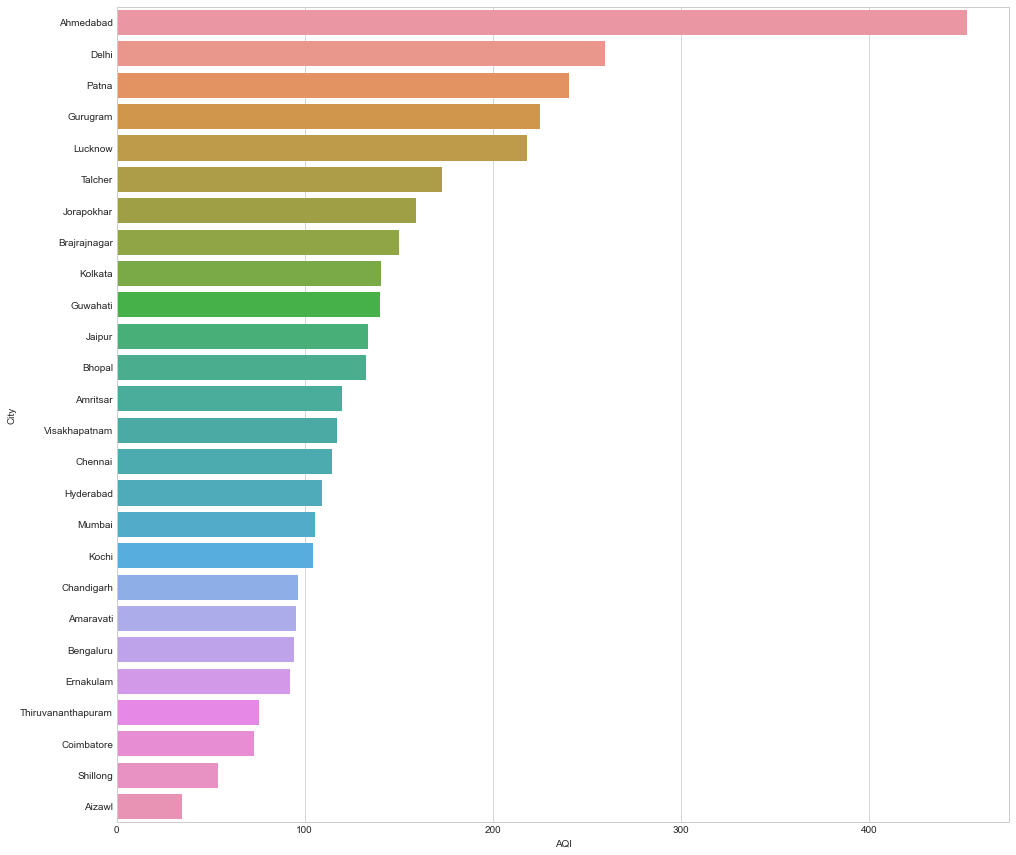

In [81]:
plt.style.use('seaborn-whitegrid')
f,ax_ = plt.subplots(1, figsize = (16,15))

bar = sns.barplot(x= most_polluted.AQI,
                  y = most_polluted.index)
                  

In [83]:
pip install plotly.express

     |████████████████████████████████| 13.1 MB 6.7 MB/s eta 0:00:01
  Using cached retrying-1.3.3.tar.gz (10 kB)
Using legacy setup.py install for retrying, since package 'wheel' is not installed.
    Running setup.py install for retrying ... done
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [88]:
import plotly.express as px

df = city_day.drop(columns = ['Date', 'AQI_Bucket', 'AQI']).groupby('City').sum().reset_index()
fig = px.treemap(pd.melt(df, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(df, id_vars = 'City')['value'],
                 title = 'Cities and their Pollution')

In [89]:
fig.show()

In [91]:
city_day['Year_Month'] = city_day.Date.apply(lambda x: x.strftime('%Y-%m'))

In [93]:
df = city_day.groupby(['Year_Month']).sum().reset_index()

metrics = corr_with_AQI[corr_with_AQI>0.5].index